In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load the datasets
train_data = pd.read_csv("C:\\Users\\User\\OneDrive\\Desktop\\fraudTrain.csv")
test_data = pd.read_csv("C:\\Users\\User\\OneDrive\\Desktop\\fraudTest.csv")



In [2]:
# Inspect column names
print(train_data.columns)
print(test_data.columns)



Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')
Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


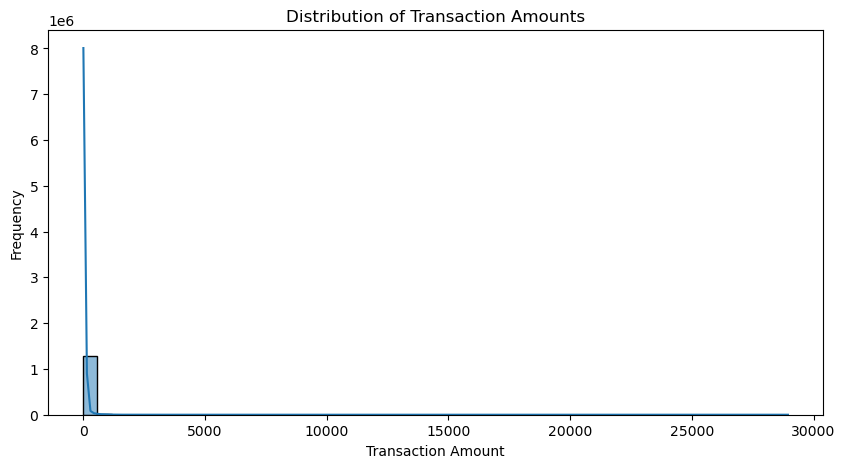

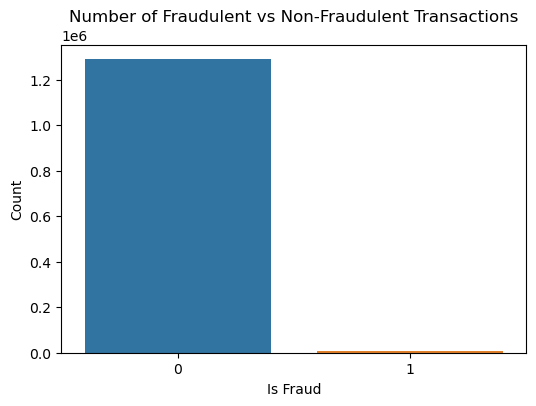

In [3]:
# Visualize the distribution of transaction amounts
plt.figure(figsize=(10, 5))
sns.histplot(train_data['amt'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Visualize the number of fraud and non-fraud transactions
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=train_data)
plt.title('Number of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

In [4]:
# Define the target column
target_column = 'is_fraud'

# Separate features and target
X_train = train_data.drop([target_column, 'Unnamed: 0'], axis=1)
y_train = train_data[target_column]

X_test = test_data.drop([target_column, 'Unnamed: 0'], axis=1)
y_test = test_data[target_column]



In [5]:
# Convert 'trans_date_trans_time' to datetime and extract features
X_train['trans_date_trans_time'] = pd.to_datetime(X_train['trans_date_trans_time'])
X_test['trans_date_trans_time'] = pd.to_datetime(X_test['trans_date_trans_time'])



In [6]:
# Extract date and time features
X_train['trans_year'] = X_train['trans_date_trans_time'].dt.year
X_train['trans_month'] = X_train['trans_date_trans_time'].dt.month
X_train['trans_day'] = X_train['trans_date_trans_time'].dt.day
X_train['trans_hour'] = X_train['trans_date_trans_time'].dt.hour
X_train['trans_minute'] = X_train['trans_date_trans_time'].dt.minute
X_train['trans_second'] = X_train['trans_date_trans_time'].dt.second

X_test['trans_year'] = X_test['trans_date_trans_time'].dt.year
X_test['trans_month'] = X_test['trans_date_trans_time'].dt.month
X_test['trans_day'] = X_test['trans_date_trans_time'].dt.day
X_test['trans_hour'] = X_test['trans_date_trans_time'].dt.hour
X_test['trans_minute'] = X_test['trans_date_trans_time'].dt.minute
X_test['trans_second'] = X_test['trans_date_trans_time'].dt.second



In [7]:
# Drop the original datetime column
X_train = X_train.drop('trans_date_trans_time', axis=1)
X_test = X_test.drop('trans_date_trans_time', axis=1)

# List of categorical columns
categorical_columns = ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job']



In [8]:
# List of numerical columns
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing pipelines for both numerical and categorical data
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_columns),
        ('cat', categorical_pipeline, categorical_columns)
    ])



In [ ]:
# Create a preprocessing and training pipeline for each model
def create_pipeline(model):
    return Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

# Define the models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    pipeline = create_pipeline(model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"{model_name}:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
[[553312    262]
 [  2140      5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.02      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.51      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

